# Agent state occupancy & trajectories

## Init

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import torch
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.ticker as ticker
from tqdm.auto import tqdm

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
save_path = Path("..") / "save"
save_path.absolute()

PosixPath('/home/kir0ul/Projects/RL_Olfaction/cartesian_polar/../save')

In [21]:
sessions_path = save_path / "2025-01-20_17-37-03_EastWest_scratch"
# sessions_path = save_path / "2025-01-19_18-09-55_EastWest_sincos"
# sessions_path = save_path / "2025-01-19_20-53-51_LeftRight_sincos"
sessions_path.absolute()

PosixPath('/home/kir0ul/Projects/RL_Olfaction/cartesian_polar/../save/2025-01-20_17-37-03_EastWest_scratch')

In [22]:
data_path = sessions_path / "data.npz"
data_path.absolute()

PosixPath('/home/kir0ul/Projects/RL_Olfaction/cartesian_polar/../save/2025-01-20_17-37-03_EastWest_scratch/data.npz')

In [23]:
data_path.exists()

True

In [24]:
data = np.load(data_path, allow_pickle=True)

In [25]:
[item for item in data.keys()]

['rewards',
 'steps',
 'episodes',
 'all_states',
 'all_actions',
 'losses',
 'p',
 'epsilons',
 'weights',
 'biases',
 'weights_val_stats',
 'biases_val_stats',
 'weights_grad_stats',
 'biases_grad_stats',
 'net',
 'env']

## State occupancy

In [26]:
all_states = data["all_states"]
all_states.shape

/home/kir0ul/Projects/RL_Olfaction/.direnv/python-3.11/lib64/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(i

(2, 80)

In [27]:
env = data["env"][()]

In [28]:
def conv_north_cartesian2orig(coords_orig):
    """Convert Cartesian coords from North port to origin (0, 0) coords."""
    new_x = -coords_orig[0] + 2
    new_y = -coords_orig[1] + 2

    # cos and sin are switch beacuse `direction_orig` is taken from the north port
    sin_dir = -coords_orig[2]
    cos_dir = -coords_orig[3]
    new_direction = torch.atan2(input=sin_dir, other=cos_dir) * 180 / math.pi
    new_direction = new_direction % 360
    return torch.tensor([new_x, new_y, new_direction], device=DEVICE)

In [29]:
def simuarray2df(arr):
    """Convert array of lists of tensors into a flat dataframe."""
    for run_id, run_val in enumerate(tqdm(arr)):
        for ep_id, ep_val in enumerate(tqdm(run_val, leave=False)):
            for step_id, state_val in enumerate(tqdm(ep_val, leave=False)):
                coords_orig = conv_north_cartesian2orig(state_val[1:5])
                if run_id == 0 and ep_id == 0 and step_id == 0:
                    res = pd.DataFrame(
                        {
                            "run": run_id,
                            "episode": ep_id,
                            "step": step_id,
                            "cue": state_val[0].item(),
                            "x": coords_orig[0].item(),
                            "y": coords_orig[1].item(),
                            "direction": coords_orig[2].item()
                        },
                        index=[0]
                    )
                else:
                    res = pd.concat(
                        [
                            res,
                            pd.DataFrame(
                                {
                                    "run": run_id,
                                    "episode": ep_id,
                                    "step": step_id,
                                    "cue": state_val[0].item(),
                                    "x": coords_orig[0].item(),
                                    "y": coords_orig[1].item(),
                                    "direction": coords_orig[2].item()
                                },
                                index=[0]
                            ),
                        ],
                        ignore_index=True,
                    )
    return res

In [30]:
all_states_df = simuarray2df(arr=all_states)
all_states_df

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

,run,episode,step,cue,x,y,direction
0,0,0,0,0.0,1.749807,-1.718616,270.000000
1,0,0,1,0.0,1.718616,-1.718616,270.000000
2,0,0,2,0.0,1.718616,-1.718616,270.000000
3,0,0,3,0.0,1.718616,-0.718616,0.000000
4,0,0,4,0.0,2.000000,-0.718616,90.000000
...,...,...,...,...,...,...,...
10729,1,79,15,2.0,1.000000,1.000000,180.000015
10730,1,79,16,2.0,0.000000,1.000000,270.000000
10731,1,79,17,2.0,0.000000,2.000000,0.000000
10732,1,79,18,2.0,-1.000000,2.000000,270.000000


In [31]:
def plot_locations_count(data, title, scale=False, cols=5, rows=5):
    # Preprocess
    hist2d, xedges, yedges = np.histogram2d(x=data.x, y=data.y, bins=[cols, rows])
    hist2d_res = hist2d.T
    if scale:
        locations_scaled = minmax_scale(hist2d.T.flatten())
        locations_scaled = locations_scaled.reshape((cols, rows))
        hist2d_res = locations_scaled

    cmap = sns.color_palette("rocket_r", as_cmap=True)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(hist2d_res, cmap=cmap, ax=ax)
    ax.set_title(title, pad=20)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    return hist2d_res

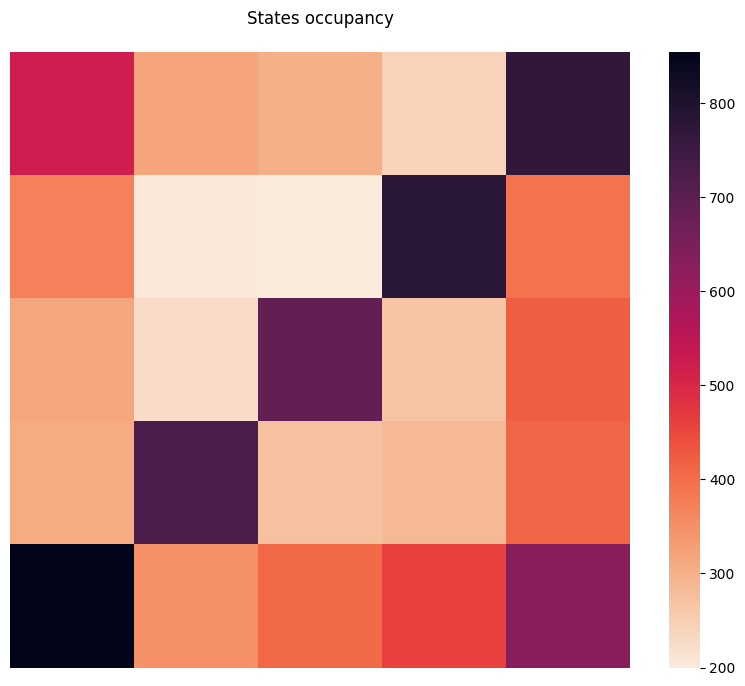

array([[521., 319., 300., 243., 770.],
       [373., 204., 200., 782., 393.],
       [317., 226., 691., 267., 421.],
       [310., 723., 272., 286., 412.],
       [855., 350., 407., 462., 630.]])

In [32]:
plot_locations_count(data=all_states_df, title="States occupancy", scale=False, cols=5, rows=5)

In [33]:
def plot_coords(data, env):
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.scatterplot(data=data, x="x", y="y", ax=ax, alpha=0.25)
    ax.set_title("States occupancy", pad=20)

    # Grid
    half_tile = env.tile_step / 2
    ax.set_yticks(
        [env.rangeY["min"] - half_tile, env.rangeY["max"] + half_tile],
        minor=True,
    )
    ax.set_xticks(
        [env.rangeX["min"] - half_tile, env.rangeX["max"] + half_tile],
        minor=True,
    )
    ax.xaxis.set_major_locator(
        ticker.MultipleLocator(
            base=env.tile_step, offset=env.rangeX["min"] - half_tile
        )
    )
    ax.yaxis.set_major_locator(
        ticker.MultipleLocator(
            base=env.tile_step, offset=env.rangeY["min"] - half_tile
        )
    )
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True, which="major")
    # ax.axes.xaxis.set_ticklabels([])
    # ax.axes.yaxis.set_ticklabels([])
    
    plt.show()

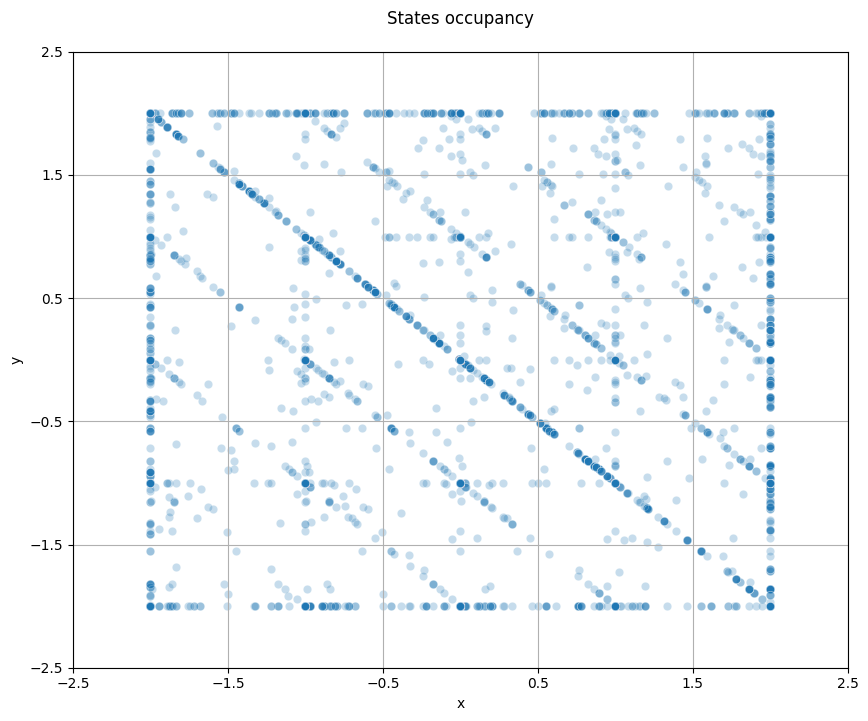

In [34]:
plot_coords(data=all_states_df, env=env)

## Trajectories

In [35]:
def plot_trajectory(x, y, steps, run_id, episode_id, env):
    cmap=plt.cm.viridis
    norm = mpl.colors.Normalize(vmin=steps.min(), vmax=steps.max())

    # Layout with colorbar
    grid_spec = {"width_ratios": (0.9, 0.05)}
    fig, (ax, cbar_ax) = plt.subplots(1, 2, gridspec_kw=grid_spec, figsize=(10, 8))

    # Plot data
    ax.scatter(
        x=x,
        y=y,
        c=steps,
        cmap=cmap,
        alpha=0.7,
    )
    ax.set_title(f"Trajectory - agent {run_id} - episode {episode_id}")

    # Color bar
    clb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
    clb.ax.set_title("Steps", pad=10)

    # Grid
    half_tile = env.tile_step / 2
    ax.set_yticks(
        [env.rangeY["min"] - half_tile, env.rangeY["max"] + half_tile],
        minor=True,
    )
    ax.set_xticks(
        [env.rangeX["min"] - half_tile, env.rangeX["max"] + half_tile],
        minor=True,
    )
    ax.xaxis.set_major_locator(
        ticker.MultipleLocator(
            base=env.tile_step, offset=env.rangeX["min"] - half_tile
        )
    )
    ax.yaxis.set_major_locator(
        ticker.MultipleLocator(
            base=env.tile_step, offset=env.rangeY["min"] - half_tile
        )
    )
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True, which="major")
    # ax.axes.xaxis.set_ticklabels([])
    # ax.axes.yaxis.set_ticklabels([])

    # Trajectory
    verts = list(zip(x, y))
    codes = [mpl.path.Path.MOVETO] + [mpl.path.Path.LINETO] * (len(verts) - 1)
    path = mpl.path.Path(verts, codes)
    GRAY = "#999999"
    patch = patches.PathPatch(path, edgecolor=GRAY, facecolor="none", lw=3, alpha=0.3)
    ax.add_patch(patch)

    plt.show()

In [36]:
run_id = 1
episode_id = 70
all_states_subset = all_states_df.query(f"run == {run_id} & episode == {episode_id}")
all_states_subset

,run,episode,step,cue,x,y,direction
10084,1,70,0,0.0,0.008323,1.621906,90.000000
10085,1,70,1,0.0,1.008323,1.621906,90.000000
10086,1,70,2,0.0,2.000000,1.621906,90.000000
10087,1,70,3,0.0,2.000000,0.621906,180.000015
10088,1,70,4,0.0,2.000000,-0.378094,180.000015
...,...,...,...,...,...,...,...
10160,1,70,76,1.0,1.000000,2.000000,0.000000
10161,1,70,77,1.0,1.000000,2.000000,0.000000
10162,1,70,78,1.0,0.000000,2.000000,270.000000
10163,1,70,79,1.0,-1.000000,2.000000,270.000000


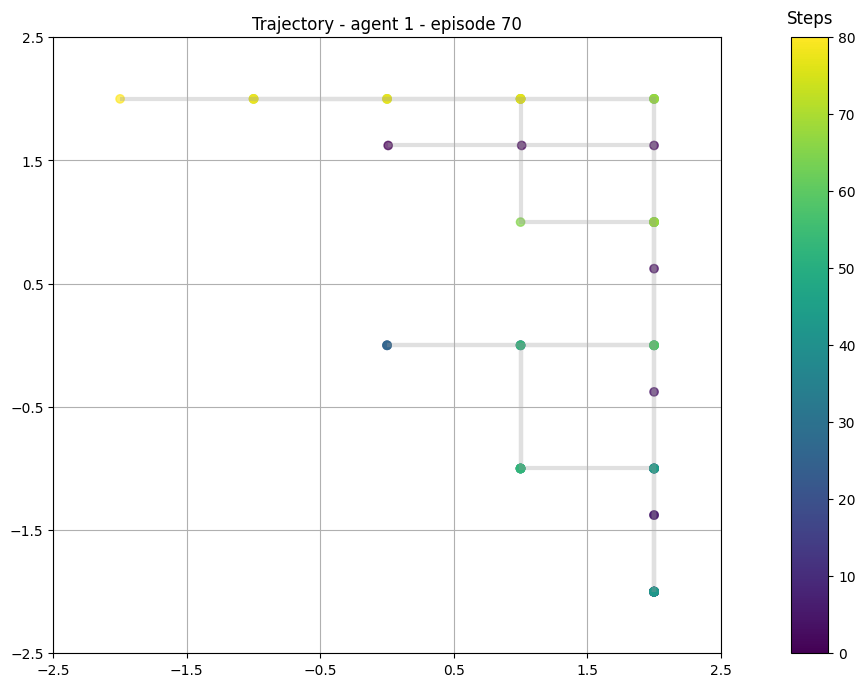

In [37]:
plot_trajectory(x=all_states_subset.x, y=all_states_subset.y, steps=all_states_subset.step, run_id=run_id, episode_id=episode_id, env=env)